In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p-value: 0.9990345964007126


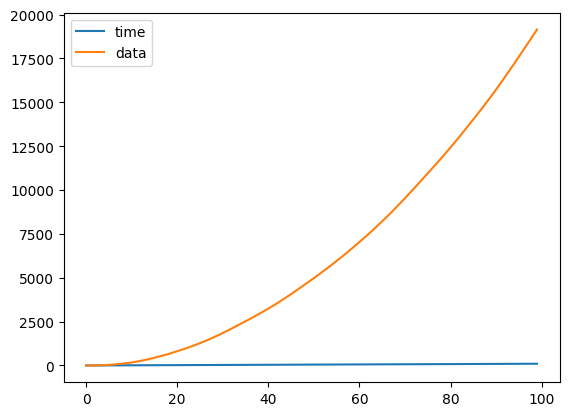

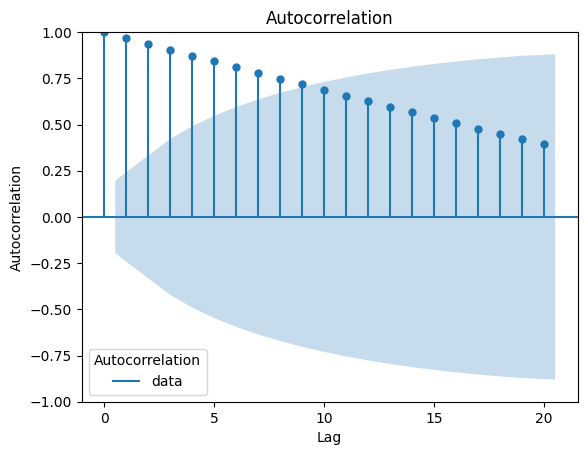

what we see is autocorrelation at lag 1 and 2, and then a sharp drop off, in the light blue region


<Axes: title={'center': 'Rolling Std'}>

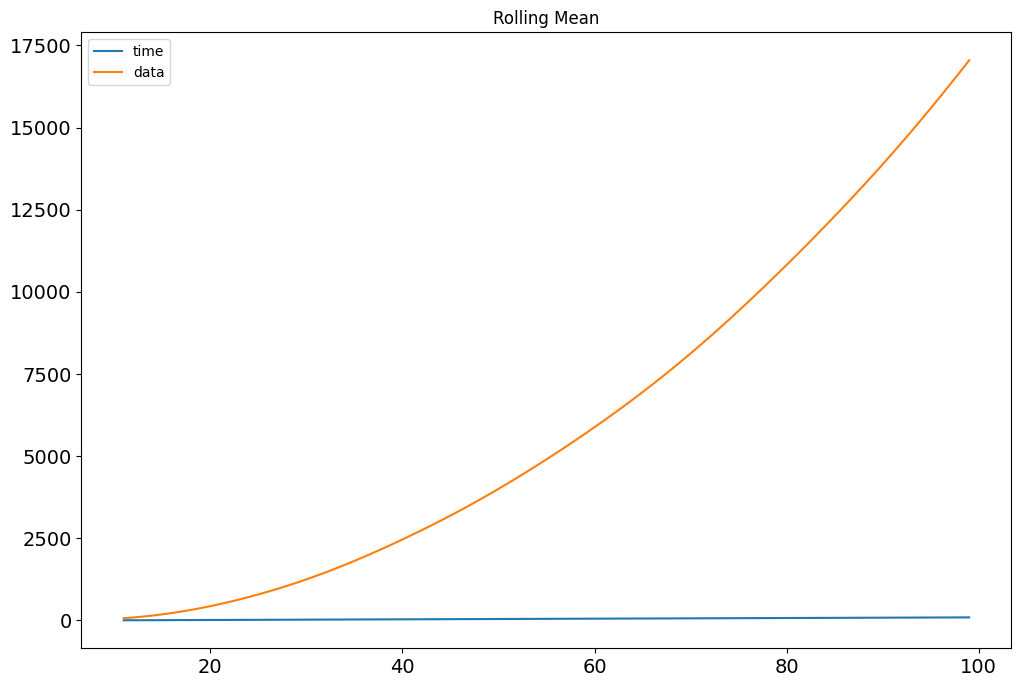

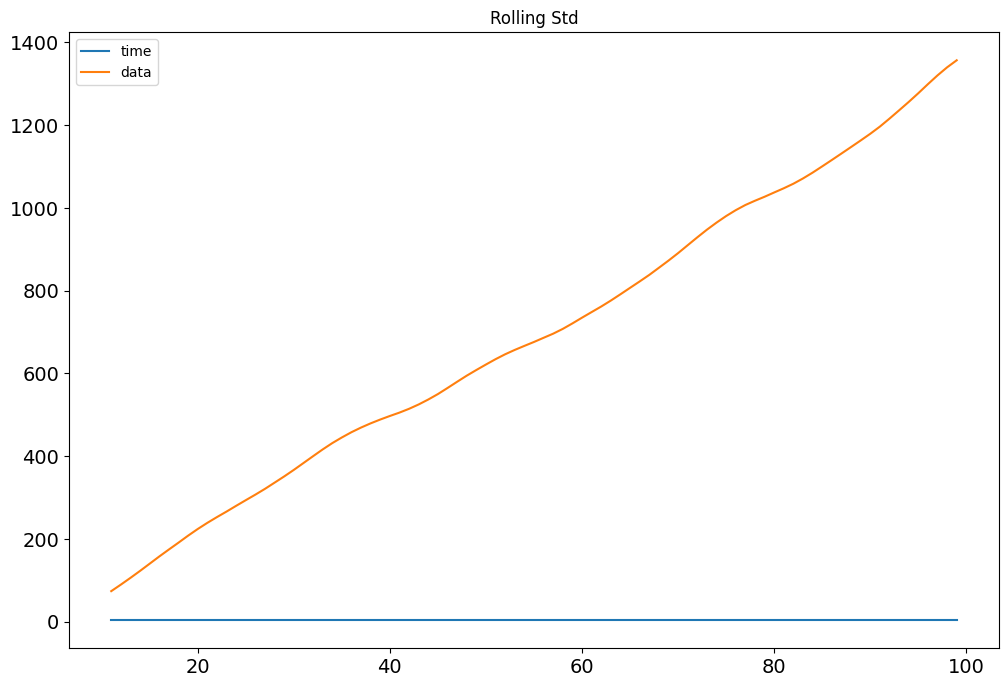

In [15]:
#read data00.csv and put it into a dataframe
df = pd.read_csv('data00.csv') 
df.head() #show the first 5 rows of the dataframe
#plot the data using pandas
df.plot()  #basic plot of each of the columns; for small change in data it will be difficult to see the trend
#test the data for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['data'])
#plot the p-value of the test
print('p-value: {}'.format(result[1])) 
#plot the autocorrelation function (same as correlation function but for time series data)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['data'])
#add legend title and labels in the bottom left corner
plt.legend(title='Autocorrelation', loc='lower left', labels=['data'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
#explain the plot
print('what we see is autocorrelation at lag 1 and 2, and then a sharp drop off, in the light blue region')
#plot the partial autocorrelation function


def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12) #window is the
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# use the rolling mean to test for stationarity
# if the rolling mean is constant over time, then the data is stationary
roll_mean = df.rolling(window=12, center=False).mean()
roll_mean.head(15)
#plot the rolling mean
roll_mean.plot(figsize=(12, 8), title='Rolling Mean', fontsize=14)
#plot the rolling standard deviation
roll_std = df.rolling(window=12, center=False).std()
roll_std.plot(figsize=(12, 8), title='Rolling Std', fontsize=14)




p-value: 0.9820257162818908


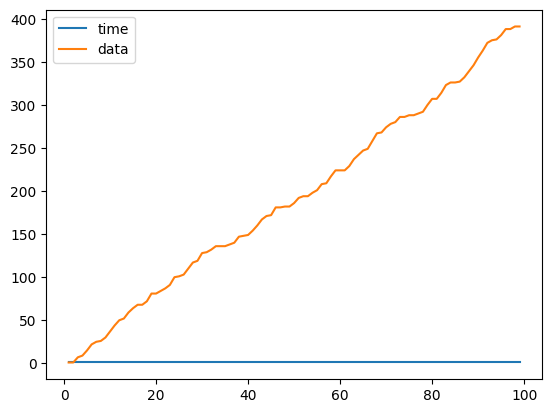

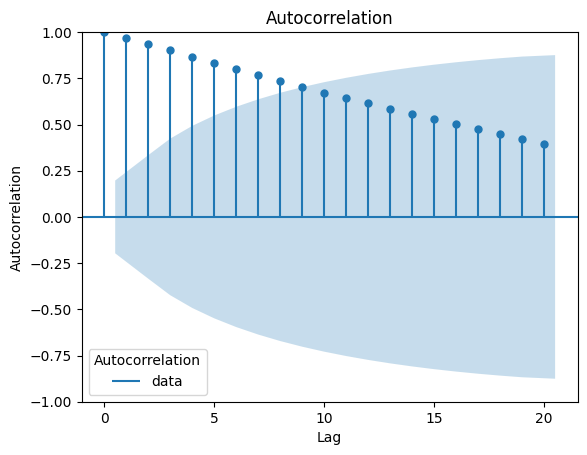

In [18]:
#test the data difference for stationarity and print the differences between the data and the rolling mean and check for trend and noise
#data difference
df_diff = df - df.shift()
df_diff.dropna(inplace=True)
df_diff.head()
#plot the data difference
df_diff.plot()
#test the data difference for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff['data'])
#plot the p-value of the test
print('p-value: {}'.format(result[1]))
#plot the autocorrelation function (same as correlation function but for time series data)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff['data'])
#add legend title and labels in the bottom left corner
plt.legend(title='Autocorrelation', loc='lower left', labels=['data'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


p-value: 4.324531495301723e-05


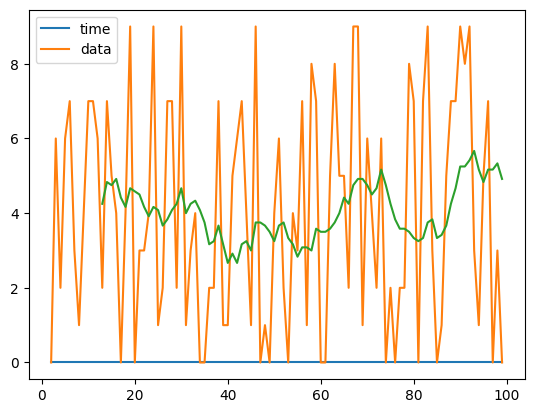

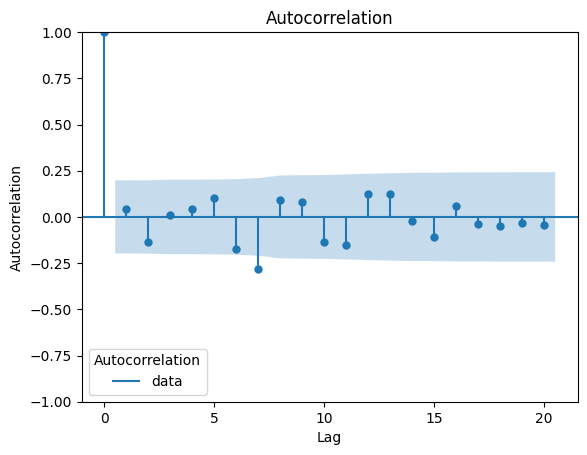

In [22]:
#plot the noise from the data difference
df_diff_noise = df_diff - df_diff.shift()
df_diff_noise.dropna(inplace=True)
df_diff_noise.head()
#plot the data difference noise
df_diff_noise.plot()
#test the data difference noise for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff_noise['data'])
#add the rolling mean of the data difference noise
df_diff_noise['data'].rolling(window=12, center=False).mean().plot()
#plot the p-value of the test
print('p-value: {}'.format(result[1]))
#plot the autocorrelation function (same as correlation function but for time series data)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff_noise['data'])
#add legend title and labels in the bottom left corner
plt.legend(title='Autocorrelation', loc='lower left', labels=['data'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
#We want to clean the noise, so we will use the ARIMA model - Autoregressive Integrated Moving Average model
#removing the noise by having a window of moving average